In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#z = 20 + x**2 + y**2 - 10 * np.cos(2 * np.pi * x) - 10 * np.cos(2 * np.pi * y)
def f1(v):
    x, y = v
    return 20+x**2 + y**2 - 10 * np.cos(2 * np.pi * x) - 10 * np.cos(2 * np.pi * y)

def grad_f1(v):
    x, y = v
    df_dx = 2 * x + 20 * np.pi * np.sin(2 * np.pi * x)
    df_dy = 2 * y + 20 * np.pi * np.sin(2 * np.pi * y)
    return np.array([df_dx, df_dy])

In [13]:
#z = sin(x) + cos(y) + 0.1 * (x**2 + y**2)
def f2(v):
    x, y = v
    return np.sin(x) + np.cos(y) +  0.1*(x**2 + y**2)

def grad_f2(v):
    x, y = v
    df_dx = np.cos(x) + 2 * x
    df_dy = -np.sin(y) + 2 * y
    return np.array([df_dx, df_dy])

In [14]:
#z=log(1+x**2+y**2)
def f3(v):
    x, y = v
    return np.log(1 + x**2 + y**2)
def grad_f3(v):
    x, y = v
    df_dx = 2 * x / (1 + x**2 + y**2)
    df_dy = 2 * y / (1 + x**2 + y**2)
    return np.array([df_dx, df_dy])

In [15]:
#Quartic banana z= (x**2 -1)**2 + y**2
def f4(v):
    x, y = v
    return (x**2 - 1)**2 + y**2 
def grad_f4(v):
    x, y = v
    df_dx = 4 * (x**2 - 1) * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])


In [16]:
#z=5x**2 + y**2
def f5(v):
    x, y = v
    return 5 * x**2 + y**2
def grad_f5(v):
    x, y = v
    df_dx = 10 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

In [17]:
#z=x*x +x*y
def f6(v):
    x, y = v
    return x * x + x * y
def grad_f6(v):
    x, y = v
    df_dx = 2 * x + y
    df_dy = x
    return np.array([df_dx, df_dy])


In [18]:
#z=8xxx+12xxy+6yy+5y-10x+7
def f7(v):
    x, y = v
    return 8 * x**3 + 12 * x**2 * y + 6 * y**2 + 5 * y - 10 * x + 7
def grad_f7(v):
    x, y = v
    df_dx = 24 * x**2 + 24 * x * y - 10
    df_dy = 12 * x**2 + 12 * y + 5
    return np.array([df_dx, df_dy])

In [19]:
#z=(x-3)**2 + (y-2)**2
def f8(v):
    x, y = v
    return (x - 3)**2 + (y - 2)**2
def grad_f8(v):
    x, y = v
    df_dx = 2 * (x - 3)
    df_dy = 2 * (y - 2)
    return np.array([df_dx, df_dy])

In [20]:
#z=(x+y)**2 + 3*(x-y)**2
def f9(v):
    x, y = v
    return (x + y)**2 + 3 * (x - y)**2  
def grad_f9(v):
    x, y = v
    df_dx = 2 * (x + y) + 6 * (x - y)
    df_dy = 2 * (x + y) - 6 * (x - y)
    return np.array([df_dx, df_dy])

In [21]:
def gradient_descent_fixed(f, grad_f, x_init, learning_rate, tolerance=1e-6, max_iter=1000):
    x = x_init.copy()
    f_values = [f(x)]
    grad_norms = [np.linalg.norm(grad_f(x))]
    c=0
    count=0
    for _ in range(max_iter):
        grad = grad_f(x)
        x_new = x - learning_rate * grad
        if np.any(np.isnan(x_new)) or np.any(np.isinf(x_new)):
            print(f"Numerical instability detected for learning rate {learning_rate}")
            count+=1
            break
        f_values.append(f(x_new))
        grad_norms.append(np.linalg.norm(grad_f(x_new)))

        if np.linalg.norm(x_new - x) < tolerance:
            break
        c += 1
        x = x_new
    if c == max_iter or count > 0:
        print("Did not converge even after maximum iterations for learning rate", learning_rate)
    else:
        print(f"Converged after {c} iterations with learning rate {learning_rate}")
    
    print(f"Final position: {x}, Function value: {f(x)}")    
    return f_values, grad_norms

In [22]:
x_init = np.array([-27.0, 23.0])  # Starting point
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Learning rates to test


In [23]:
#for estimating the step size using Armijo's rule
def armijo_backtracking(f, grad_f, x, direction, alpha=1.0, beta=0.8, sigma=1e-4):
    fx = f(x)
    grad_dot_dir = np.dot(grad_f(x), direction)
    while f(x + alpha * direction) > fx + sigma * alpha * grad_dot_dir:
        alpha *= beta
    return alpha

In [27]:

initial_direction = -grad_f1(x_init)
armijo_alpha = armijo_backtracking(f1, grad_f1, x_init, initial_direction)
print(f"Estimated Armijo learning rate at start: {armijo_alpha}\n")

Estimated Armijo learning rate at start: 0.8



Did not converge even after maximum iterations for learning rate 0.1
Final position: [-10.62355149  10.34654275], Function value: 252.74666355732305
Did not converge even after maximum iterations for learning rate 0.2
Final position: [-19.62779686 -14.05769326], Function value: 600.4647295744887
Did not converge even after maximum iterations for learning rate 0.3
Final position: [17.02581338 12.37165355], Function value: 459.9882101415501
Did not converge even after maximum iterations for learning rate 0.4
Final position: [-6.88620956 -6.16610379], Function value: 92.85896823786285
Converged after 1 iterations with learning rate 0.5
Final position: [-4.29878355e-13  4.01456646e-13], Function value: 0.0
Did not converge even after maximum iterations for learning rate 0.6
Final position: [  8.91351954 -31.01248124], Function value: 1042.6958603315886
Did not converge even after maximum iterations for learning rate 0.7
Final position: [58.17025444 -9.50213148], Function value: 3499.264585

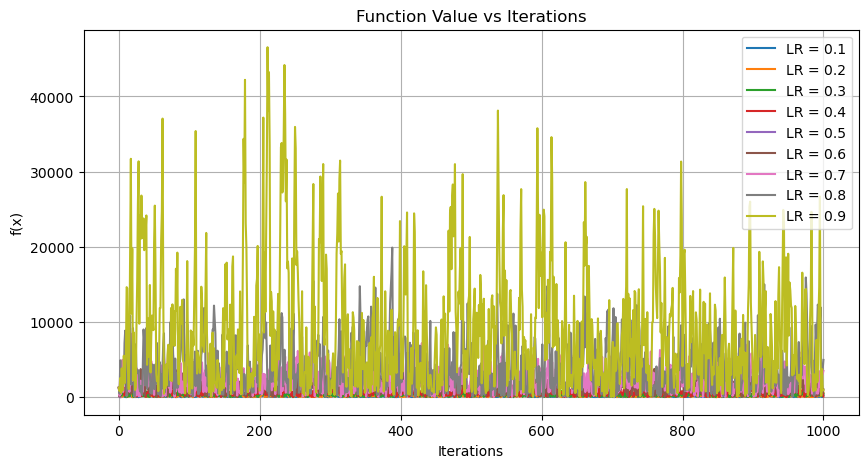

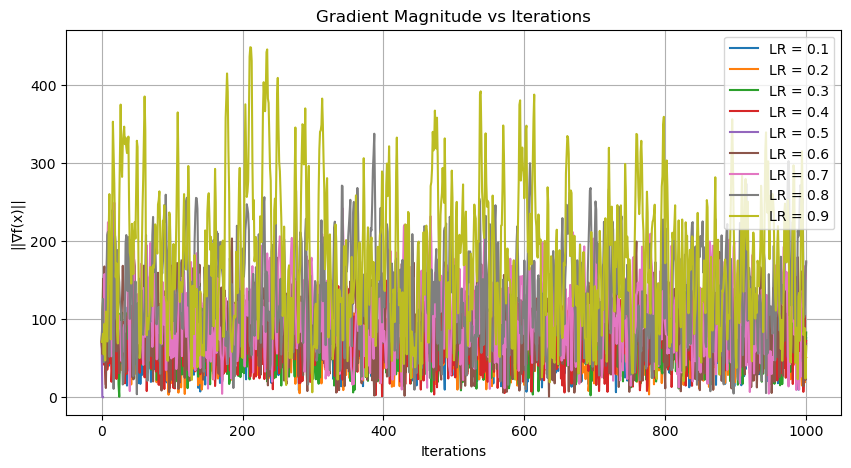

In [25]:
#for plotting all the results together
f_results = {}
grad_results = {}


for lr in learning_rates:
    f_vals, grad_vals = gradient_descent_fixed(f, grad_f, x_init, lr)
    f_results[lr] = f_vals
    grad_results[lr] = grad_vals

# Function Value Plot   
plt.figure(figsize=(10, 5))
for lr in learning_rates:
    plt.plot(f_results[lr], label=f"LR = {lr}")
plt.title("Function Value vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Gradient Norm Plot
plt.figure(figsize=(10, 5))
for lr in learning_rates:
    plt.plot(grad_results[lr], label=f"LR = {lr}")
plt.title("Gradient Magnitude vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("||∇f(x)||")
plt.legend()
plt.grid(True)
plt.show()

Did not converge even after maximum iterations for learning rate 0.1
Final position: [-10.62355149  10.34654275], Function value: 252.74666355732305


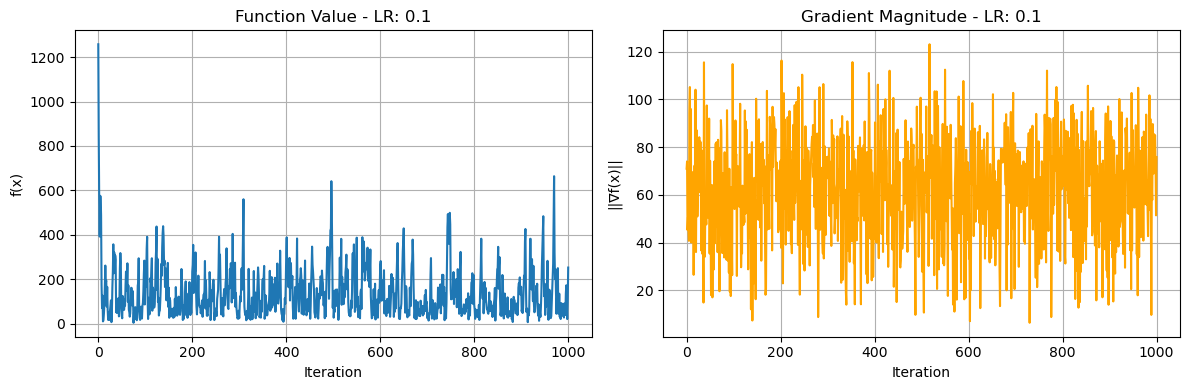

Did not converge even after maximum iterations for learning rate 0.2
Final position: [-19.62779686 -14.05769326], Function value: 600.4647295744887


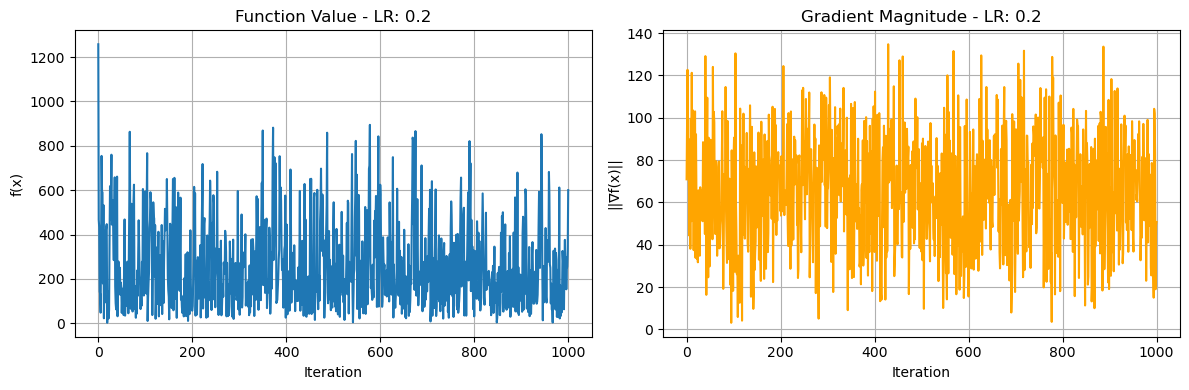

Did not converge even after maximum iterations for learning rate 0.3
Final position: [17.02581338 12.37165355], Function value: 459.9882101415501


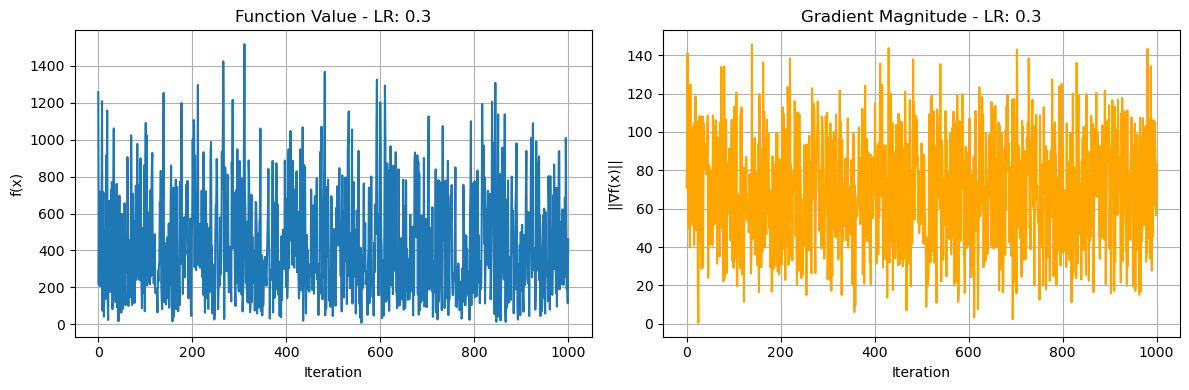

Did not converge even after maximum iterations for learning rate 0.4
Final position: [-6.88620956 -6.16610379], Function value: 92.85896823786285


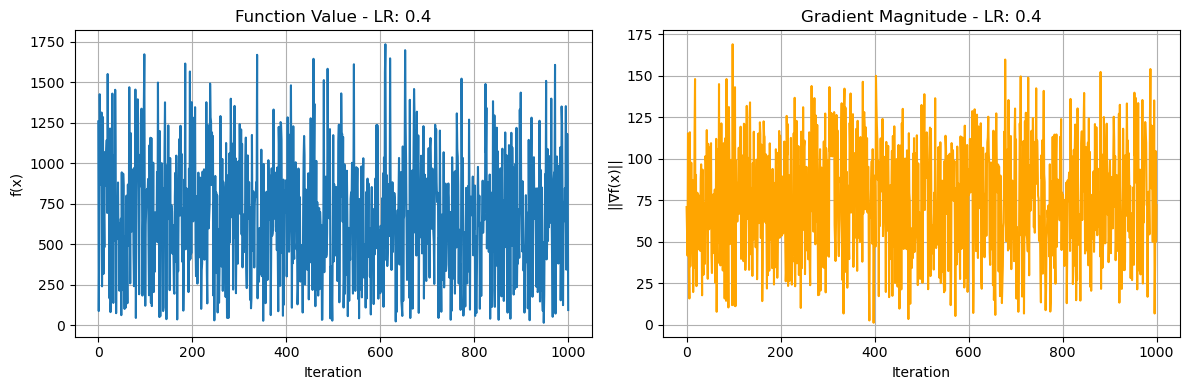

Converged after 1 iterations with learning rate 0.5
Final position: [-4.29878355e-13  4.01456646e-13], Function value: 0.0


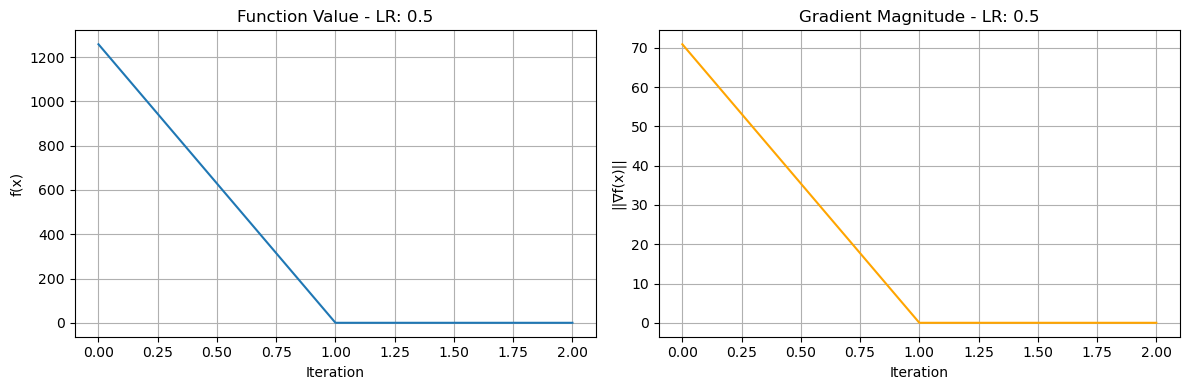

Did not converge even after maximum iterations for learning rate 0.6
Final position: [  8.91351954 -31.01248124], Function value: 1042.6958603315886


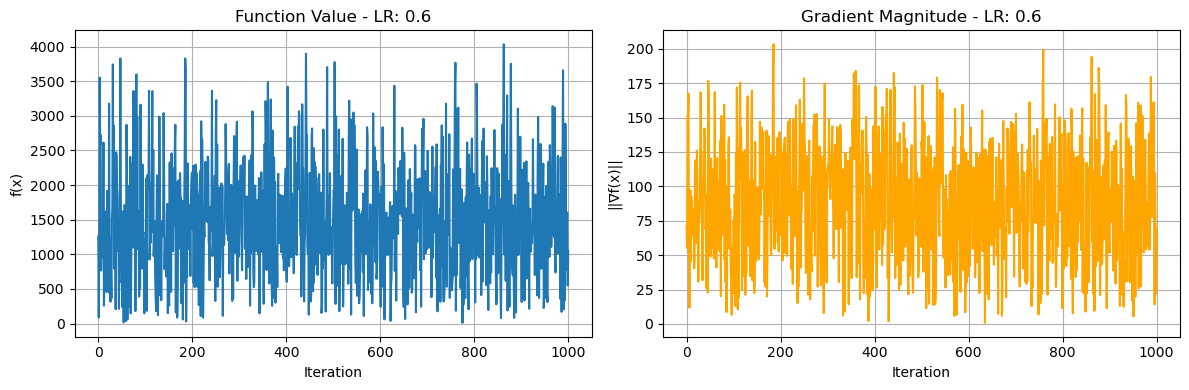

Did not converge even after maximum iterations for learning rate 0.7
Final position: [58.17025444 -9.50213148], Function value: 3499.2645857041584


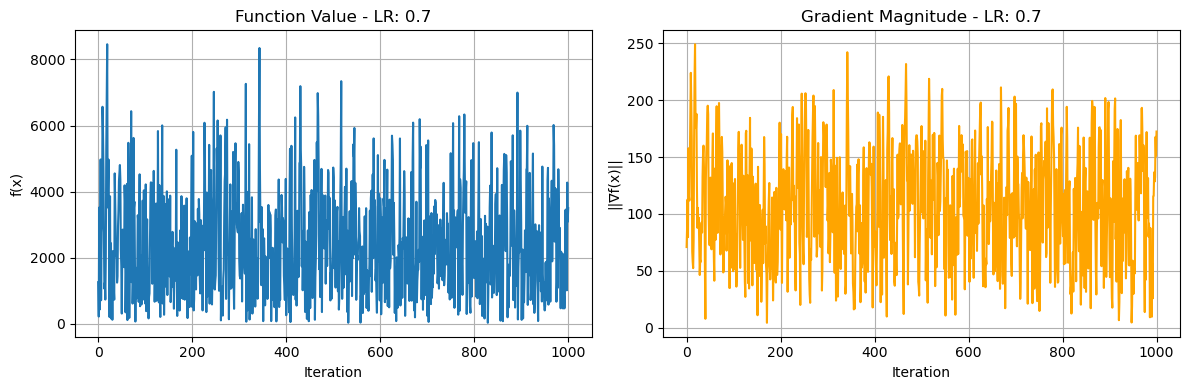

Did not converge even after maximum iterations for learning rate 0.8
Final position: [-34.9244463   61.13356573], Function value: 4961.455143908114


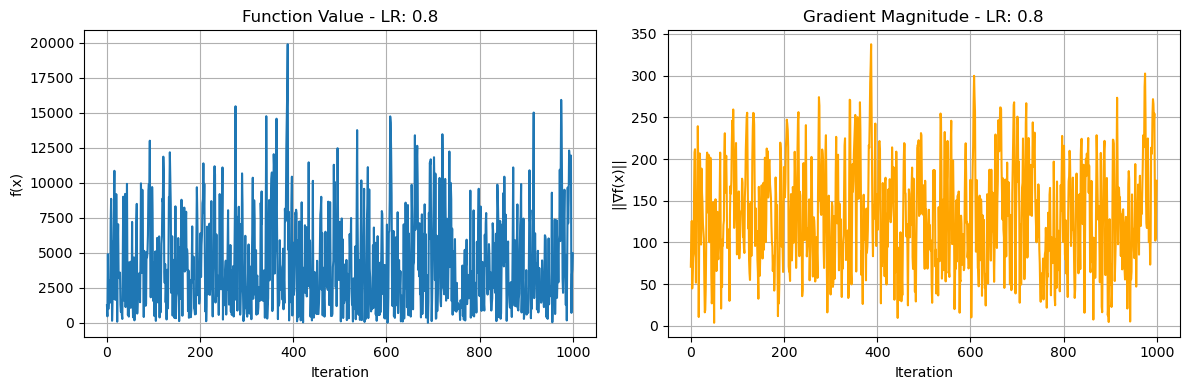

Did not converge even after maximum iterations for learning rate 0.9
Final position: [-4.86984602 29.511616  ], Function value: 917.7858412499295


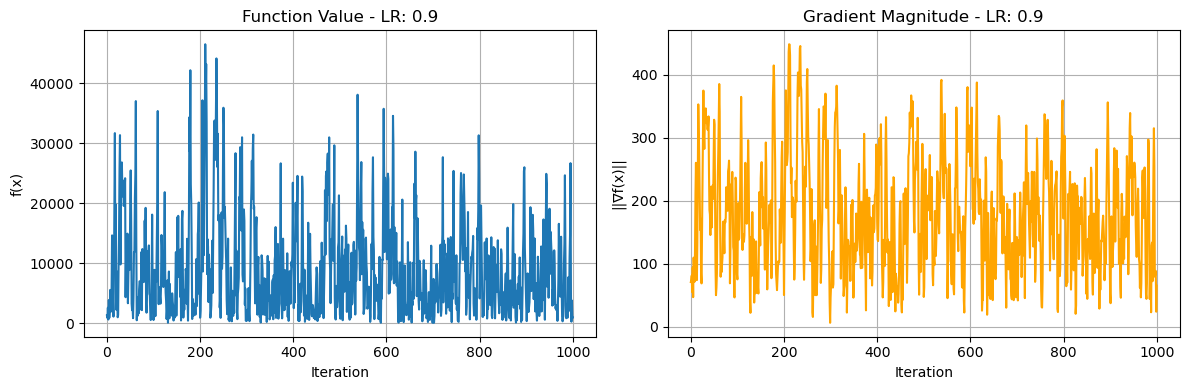

In [26]:
#for plotting side-by-side subplots for EACH learning rate
for lr in learning_rates:
    f_vals, grad_norms = gradient_descent_fixed(f1, grad_f1, x_init, learning_rate=lr)
    
    # Plotting side-by-side subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    axs[0].plot(f_vals)
    axs[0].set_title(f"Function Value - LR: {lr}")
    axs[0].set_xlabel("Iteration")
    axs[0].set_ylabel("f(x)")
    axs[0].grid(True)

    axs[1].plot(grad_norms, color='orange')
    axs[1].set_title(f"Gradient Magnitude - LR: {lr}")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel("||∇f(x)||")
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()
